In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
# S&P index from 1959
# https://data.nasdaq.com/data/MULTPL/SP500_REAL_PRICE_MONTH-sp-500-real-price-by-month
# https://data.nasdaq.com/api/v3/datasets/MULTPL/SP500_REAL_PRICE_MONTH.csv?start_date=1959-01-01
# MULTPL/SP500_REAL_PRICE_MONTH
csv_file = '/mnt/notebooks/data/MULTPL-SP500_REAL_PRICE_MONTH.csv'

df = pd.read_csv(csv_file, encoding='cp1252')

In [28]:
df.head()

,Date,Value
0,2023-07-01,4453.71
1,2023-06-30,4450.38
2,2023-06-01,4345.37
3,2023-05-31,4179.83
4,2023-05-01,4146.17


In [29]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_values(by='Date', ascending=True, inplace=True)
df.head()

,Value
Date,
1959-01-01,55.62
1959-02-01,54.77
1959-03-01,56.16
1959-04-01,57.10
1959-05-01,57.96


In [47]:
# source data contains some 1st day of month and some last day of month
# but not consistent (not always business day on first/last day of month??)
# resample to ensure we have one row per month
df_monthly_delta = df.resample('M').mean()
df_monthly_delta.head()

,Value
Date,
1959-01-31,55.62
1959-02-28,54.77
1959-03-31,56.16
1959-04-30,57.10
1959-05-31,57.96


In [48]:
df_monthly_delta['Change'] = df_monthly_delta.pct_change(periods=12)*100
#df_monthly_delta.pct_change()
df_monthly_delta.tail()

,Value,Change
Date,,
2023-03-31,4038.935,-9.457972
2023-04-30,4121.470,-6.144650
2023-05-31,4163.000,1.878126
2023-06-30,4397.875,14.463460
2023-07-31,4453.710,13.855251


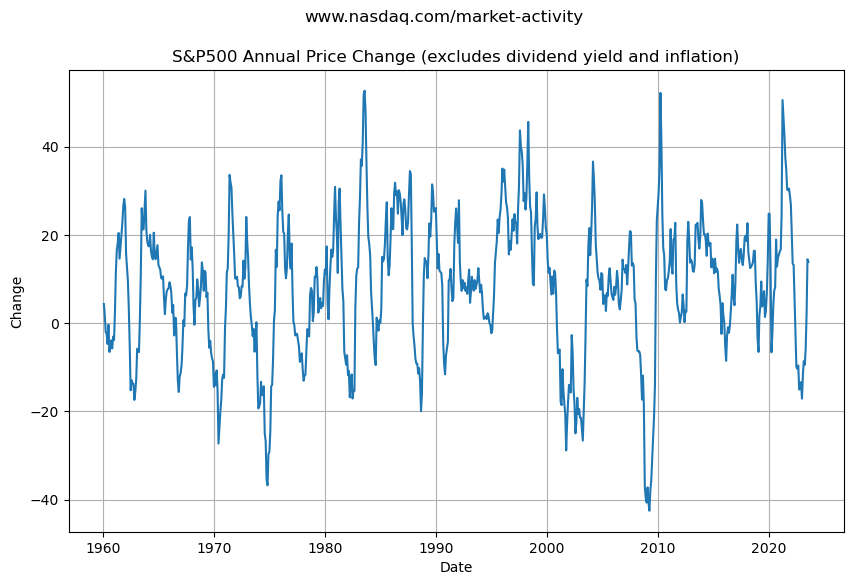

In [52]:
plt.figure(figsize=(10, 6))
#plt.plot(df_monthly_average.index, df_monthly_average['Price'])
plt.plot(df_monthly_delta.index, df_monthly_delta['Change'])
plt.xlabel('Date')
plt.ylabel('Change')
plt.suptitle('www.nasdaq.com/market-activity')
plt.title('S&P500 Annual Price Change (excludes dividend yield and inflation)')
plt.grid(True)
plt.show()

In [54]:
df_monthly_delta['3_yr_rolling'] = df_monthly_delta['Change'].rolling(window=36, min_periods=1).mean()
df_monthly_delta.tail()

,Value,Change,3_yr_rolling
Date,,,
2023-03-31,4038.935,-9.457972,11.817448
2023-04-30,4121.470,-6.144650,11.710469
2023-05-31,4163.000,1.878126,11.647486
2023-06-30,4397.875,14.463460,11.845200
2023-07-31,4453.710,13.855251,12.004534


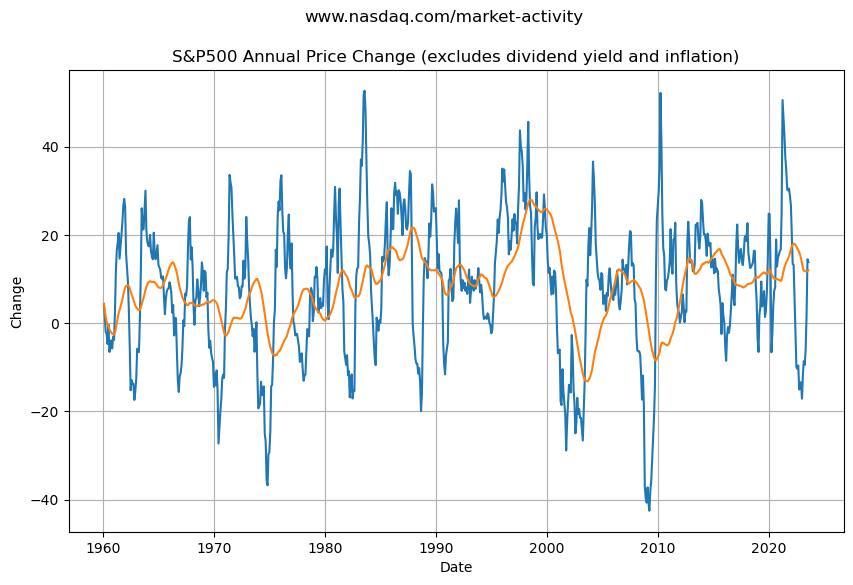

In [55]:
plt.figure(figsize=(10, 6))
#plt.plot(df_monthly_average.index, df_monthly_average['Price'])
plt.plot(df_monthly_delta.index, df_monthly_delta['Change'], df_monthly_delta['3_yr_rolling'])
plt.xlabel('Date')
plt.ylabel('Change')
plt.suptitle('www.nasdaq.com/market-activity')
plt.title('S&P500 Annual Price Change (excludes dividend yield and inflation)')
plt.grid(True)
plt.show()